In [1]:
import os

import tensorflow as tf
import numpy as np
import pandas as pd

import autoencoder_train
import network
import utils

/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
datadir = "/v/Data/cyto/mmFromTifs/"
# datadir = "/home/cjw/disk2cjw/Data/cyto/mmFromTifs"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/v/Data/cyto/mmFromTifs/Fish6_CCB.mm', '/v/Data/cyto/mmFromTifs/Fish6_ICE.mm', '/v/Data/cyto/mmFromTifs/Fish6_Untreated.mm']
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
30000


dict_keys(['Fish6_CCB.mm', 'Fish6_ICE.mm', 'Fish6_Untreated.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000


Encoder True
[<tf.Tensor 'Placeholder:0' shape=(?, 64, 64, 1) dtype=float32>, <tf.Tensor 'dropout/mul:0' shape=(?, 32, 32, 64) dtype=float32>, <tf.Tensor 'dropout_1/mul:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'dropout_2/mul:0' shape=(?, 8, 8, 256) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 128), dtype=float32)
isize:  8 64
[<tf.Tensor 'dropout_3/mul:0' shape=(?, 16384) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 8, 8, 256) dtype=float32>, <tf.Tensor 'dropout_4/mul:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'dropout_5/mul:0' shape=(?, 32, 32, 64) dtype=float32>] Tensor("decoder_out/BiasAdd:0", shape=(?, 64, 64, 1), dtype=float32)
Tensor("Mean_1:0", shape=(), dtype=float32) Tensor("Mean_2:0", shape=(), dtype=float32) Tensor("add_5:0", shape=(), dtype=float32)
30000 468 64
Epoch:  0 Iteration:  0 Loss:  390.28204 2.831717 0.3547269


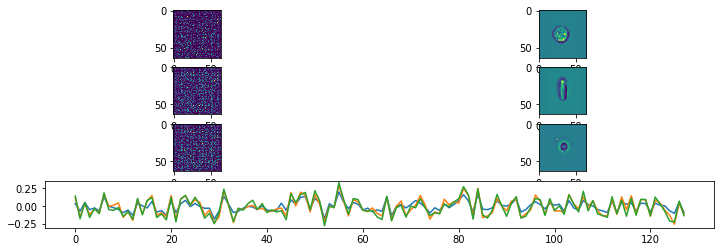

Epoch:  1 Iteration:  0 Loss:  5.926204 0.6173303 0.0027078092


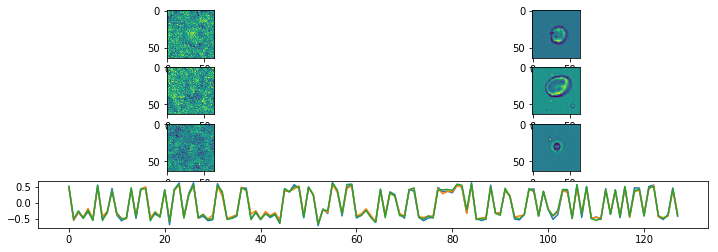

Epoch:  2 Iteration:  0 Loss:  4.470127 0.6165333 0.0017443001


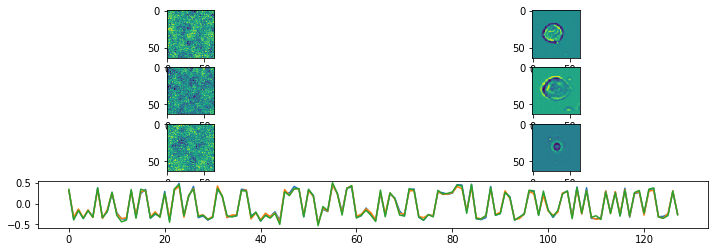

Epoch:  3 Iteration:  0 Loss:  4.6229115 0.61664814 0.0017087162


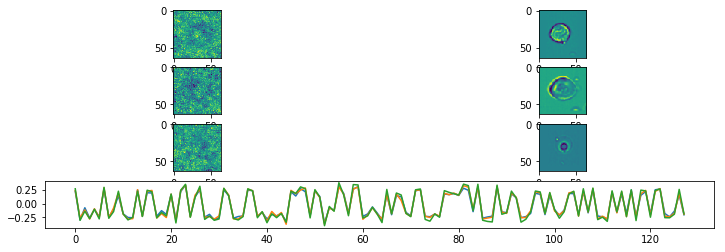

Epoch:  4 Iteration:  0 Loss:  3.9241989 0.616233 0.00030446053


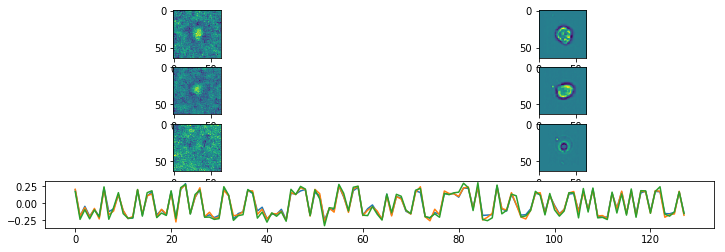

Epoch:  5 Iteration:  0 Loss:  3.3965068 0.61592114 0.00081157684


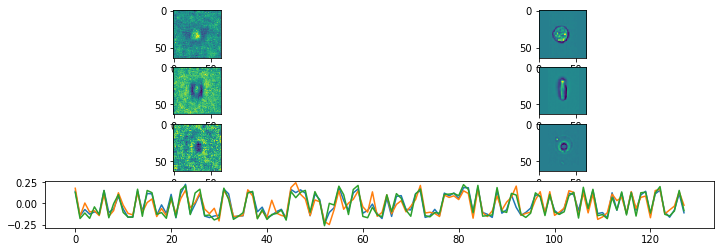

Epoch:  6 Iteration:  0 Loss:  3.0125337 0.6156968 0.00040739775


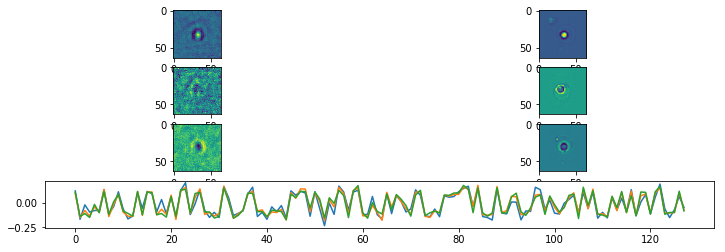

Epoch:  7 Iteration:  0 Loss:  2.8007383 0.61557436 0.00034189224


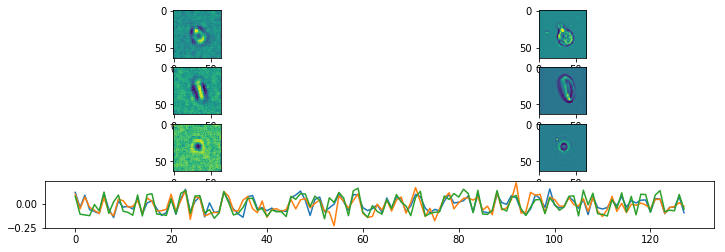

Epoch:  8 Iteration:  0 Loss:  2.4583664 0.6153721 0.00039085746


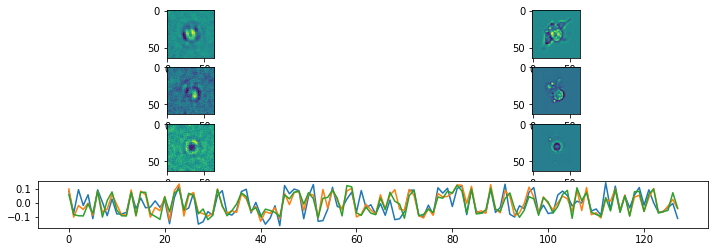

Epoch:  9 Iteration:  0 Loss:  2.2765207 0.615264 0.0002462566


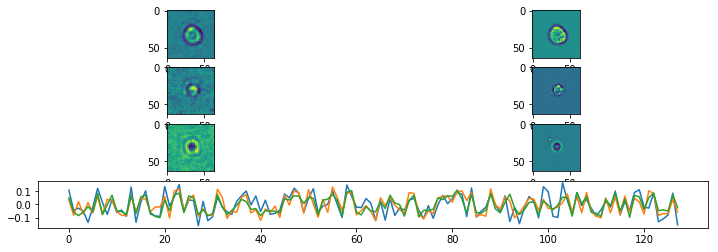

Epoch:  10 Iteration:  0 Loss:  2.1819813 0.61520714 5.966425e-05


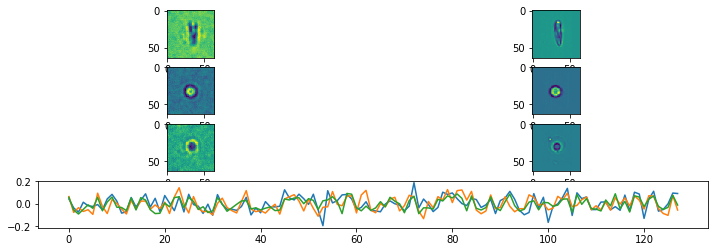

Epoch:  11 Iteration:  0 Loss:  2.136471 0.61517715 0.00096702576


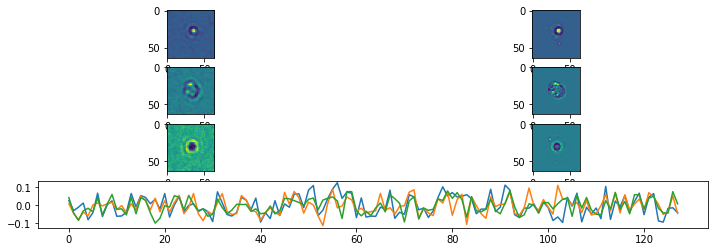

Epoch:  12 Iteration:  0 Loss:  1.9929578 0.6150962 0.00013998151


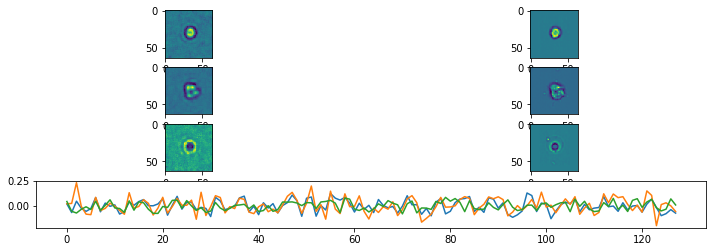

Epoch:  13 Iteration:  0 Loss:  1.9259609 0.6150552 0.00020006299


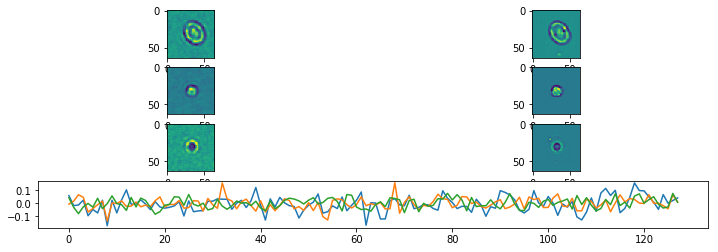

Epoch:  14 Iteration:  0 Loss:  1.8668799 0.61502033 0.00022733212


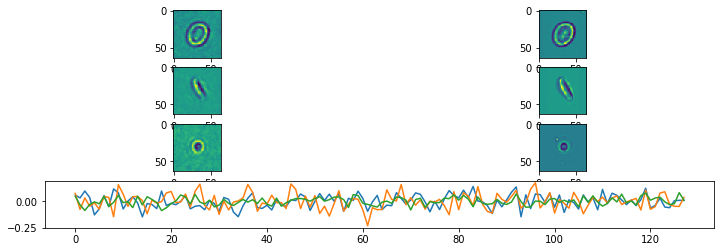

Epoch:  15 Iteration:  0 Loss:  1.8250074 0.6149961 5.0753355e-05


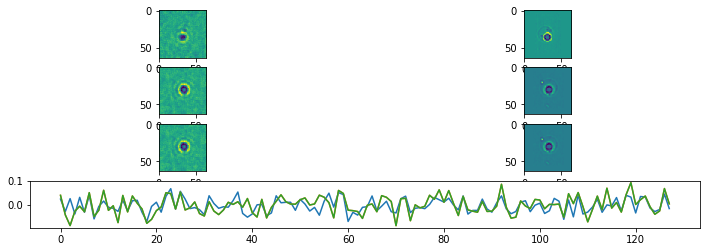

Epoch:  16 Iteration:  0 Loss:  1.7978595 0.61498046 0.00014132261


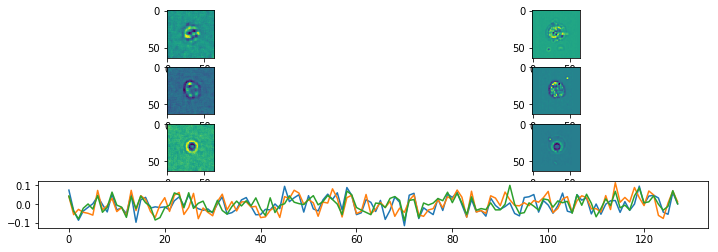

Epoch:  17 Iteration:  0 Loss:  1.7590883 0.6149576 0.00032442808


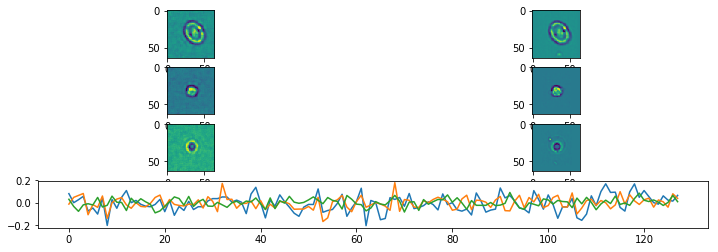

Epoch:  18 Iteration:  0 Loss:  1.7600554 0.61495674 0.00063198805


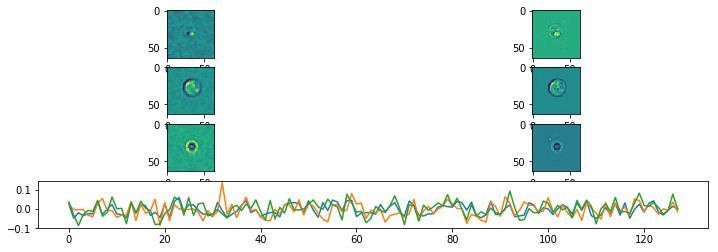

Epoch:  19 Iteration:  0 Loss:  1.697333 0.6149203 0.00015568733


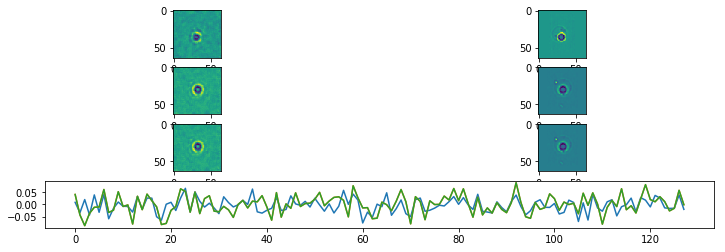

Epoch:  20 Iteration:  0 Loss:  1.6805863 0.61490995 0.00035357475


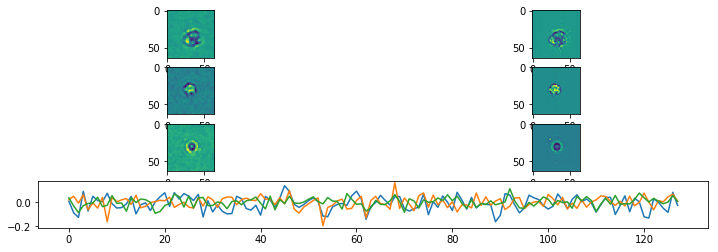

Epoch:  21 Iteration:  0 Loss:  1.6552203 0.6148958 0.00024664402


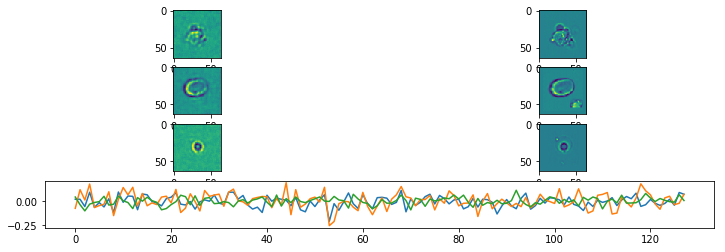

Epoch:  22 Iteration:  0 Loss:  1.6382365 0.61488545 0.00025331974


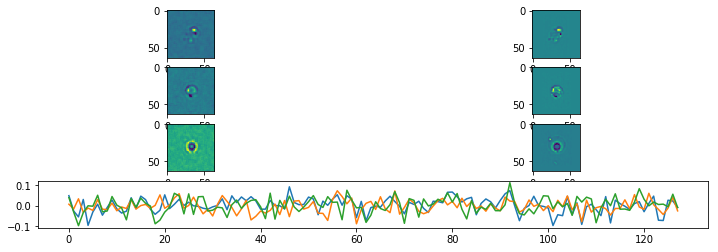

Epoch:  23 Iteration:  0 Loss:  1.9688268 0.61507237 0.0015848279


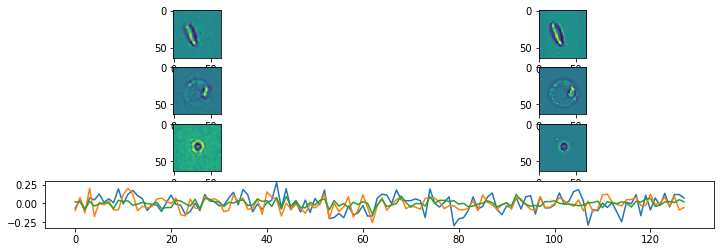

Epoch:  24 Iteration:  0 Loss:  1.6065805 0.6148671 5.2183867e-05


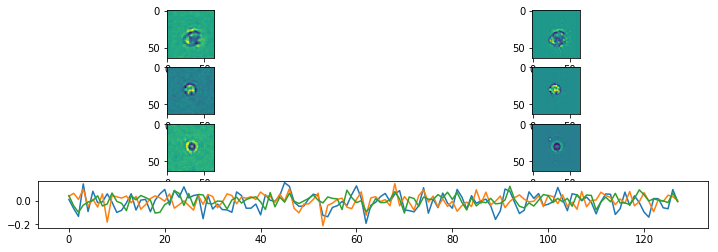

Epoch:  25 Iteration:  0 Loss:  1.5980322 0.6148617 0.00014573336


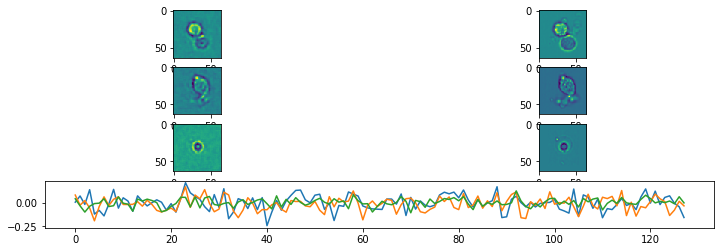

Epoch:  26 Iteration:  0 Loss:  1.5870867 0.6148555 1.5258789e-05


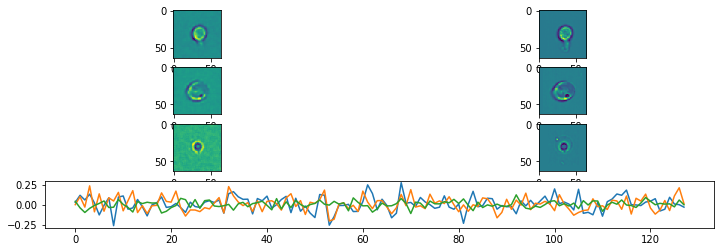

Epoch:  27 Iteration:  0 Loss:  1.5840578 0.6148535 0.00018572807


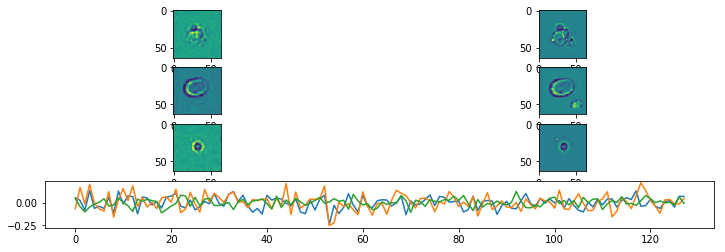

Epoch:  28 Iteration:  0 Loss:  1.5721254 0.6148468 0.0003196001


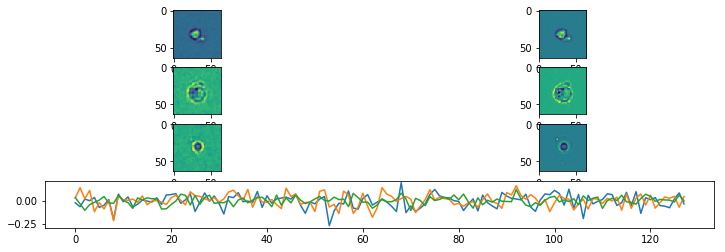

Epoch:  29 Iteration:  0 Loss:  1.5551908 0.6148366 0.00014597178


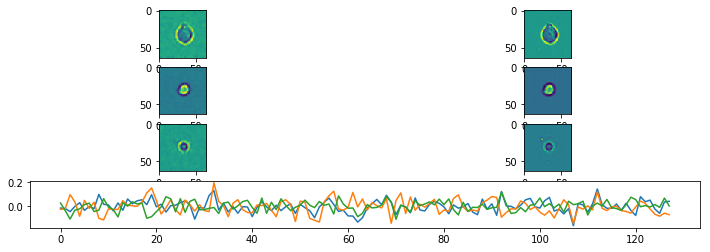

Epoch:  30 Iteration:  0 Loss:  1.5511749 0.6148348 8.97944e-05


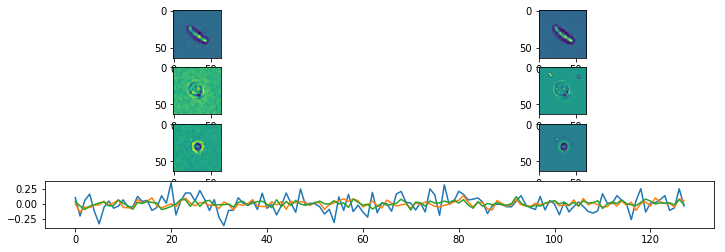

Epoch:  31 Iteration:  0 Loss:  1.5412099 0.6148289 3.0040741e-05


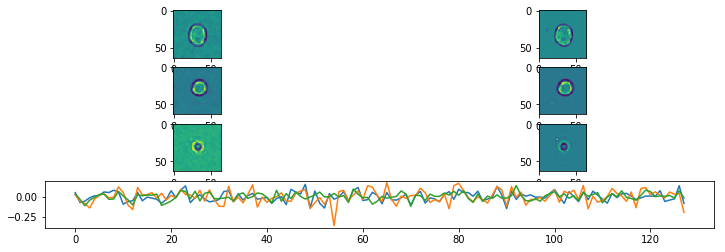

Epoch:  32 Iteration:  0 Loss:  1.5374107 0.61482644 2.899766e-05


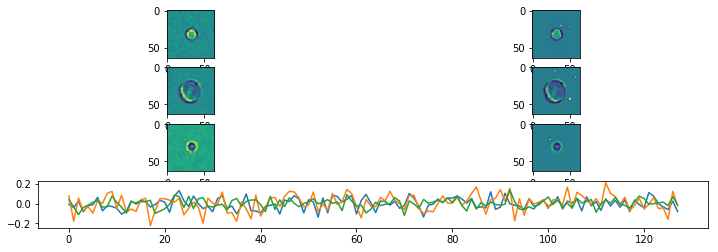

Epoch:  33 Iteration:  0 Loss:  1.5266321 0.6148207 0.00015616417


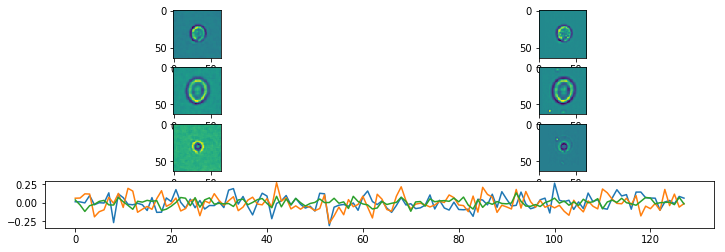

Epoch:  34 Iteration:  0 Loss:  1.5212542 0.614817 2.9206276e-05


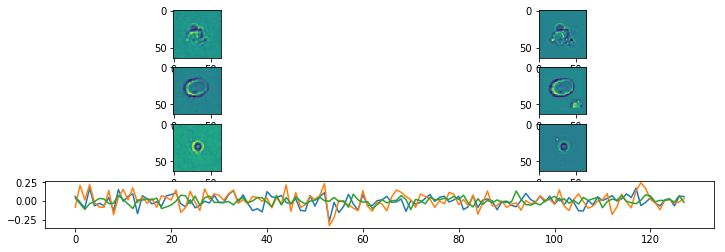

Epoch:  35 Iteration:  0 Loss:  1.5237982 0.6148182 0.0003260076


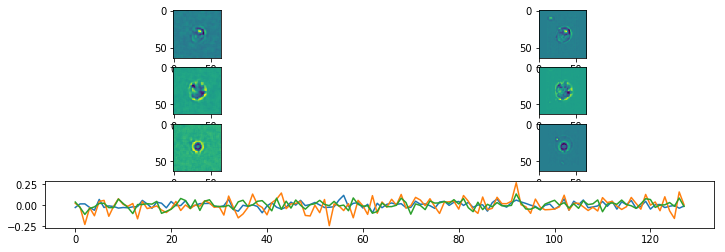

Epoch:  36 Iteration:  0 Loss:  1.5131797 0.61481214 0.0001039505


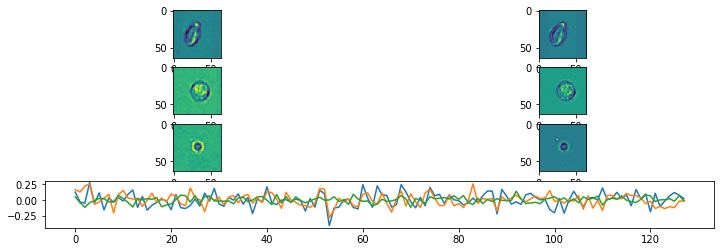

Epoch:  37 Iteration:  0 Loss:  1.5113533 0.61481094 6.28829e-05


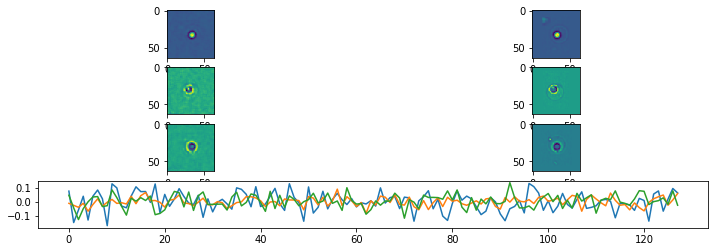

Epoch:  38 Iteration:  0 Loss:  1.510217 0.61481035 0.0002837777


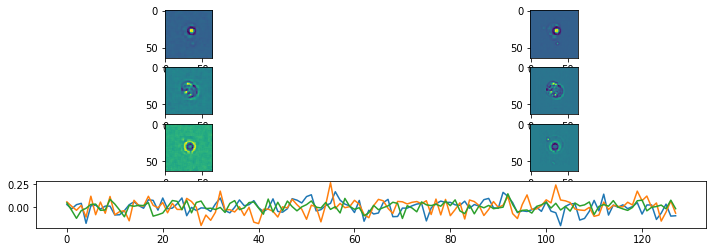

Epoch:  39 Iteration:  0 Loss:  1.5504165 0.6148344 0.00031769276


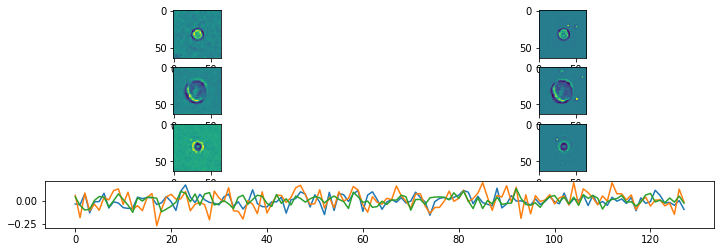

Epoch:  40 Iteration:  0 Loss:  1.5013087 0.61480534 0.00016134977


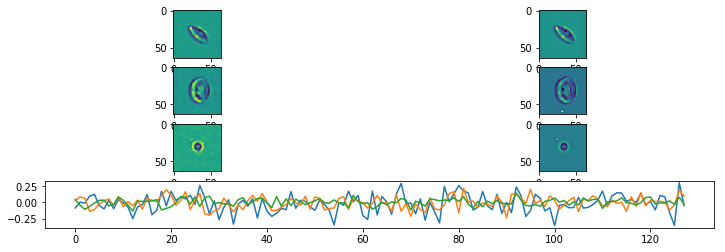

Epoch:  41 Iteration:  0 Loss:  1.4963745 0.6148019 0.00012034178


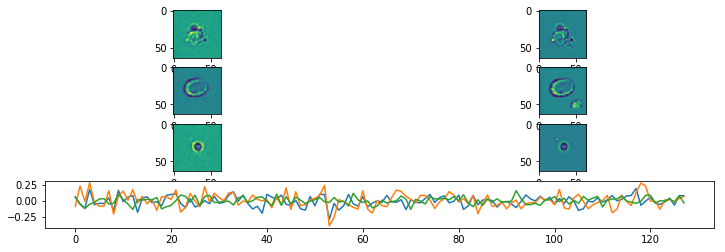

Epoch:  42 Iteration:  0 Loss:  1.5020746 0.61480576 0.00018027425


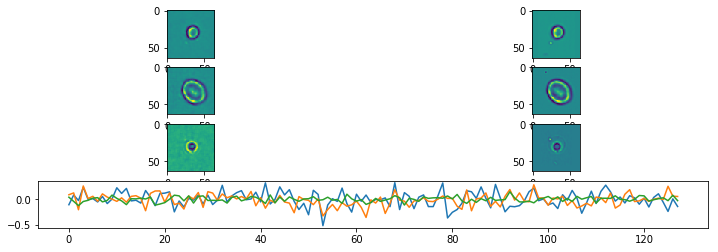

Epoch:  43 Iteration:  0 Loss:  1.4880373 0.6147971 0.00015377998


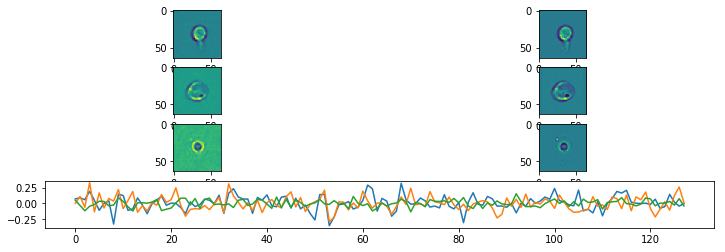

Epoch:  44 Iteration:  0 Loss:  1.4903417 0.61479867 0.00022643805


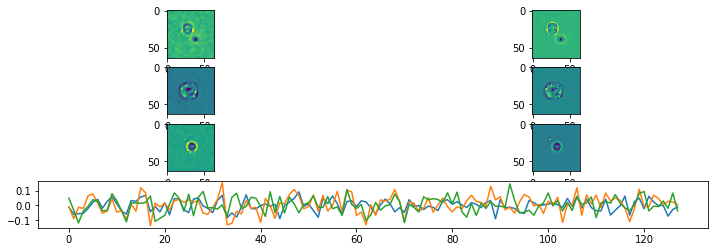

Epoch:  45 Iteration:  0 Loss:  1.48435 0.61479497 8.460879e-05


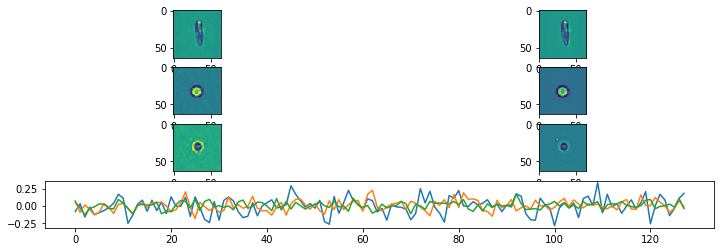

Epoch:  46 Iteration:  0 Loss:  1.4838759 0.61479497 0.00020498037


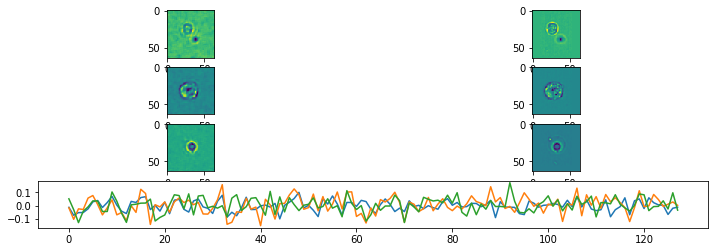

Epoch:  47 Iteration:  0 Loss:  1.4732006 0.6147882 4.464388e-05


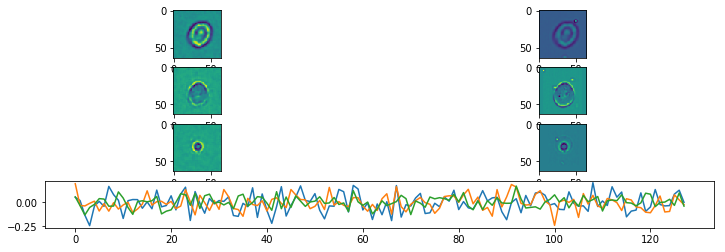

Epoch:  48 Iteration:  0 Loss:  1.4746265 0.6147895 2.4497509e-05


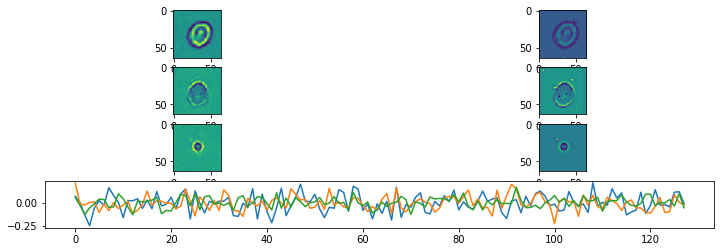

Epoch:  49 Iteration:  0 Loss:  1.4737513 0.6147888 3.552437e-05


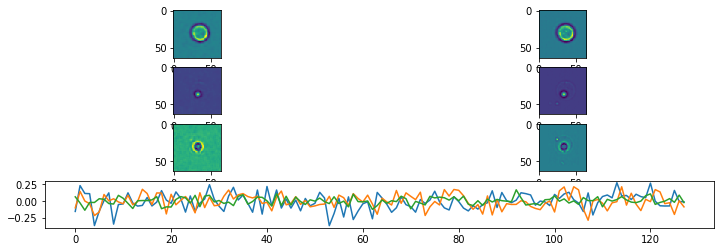

Epoch:  50 Iteration:  0 Loss:  1.4690343 0.61478573 0.00016665459


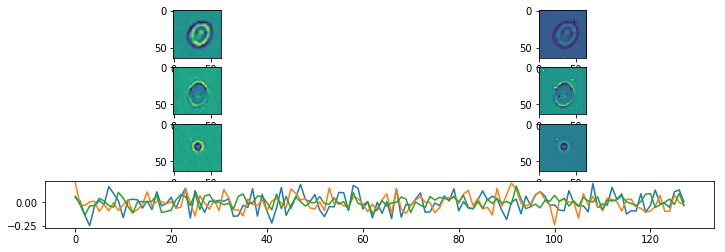

Epoch:  51 Iteration:  0 Loss:  1.4690299 0.6147857 0.00028809905


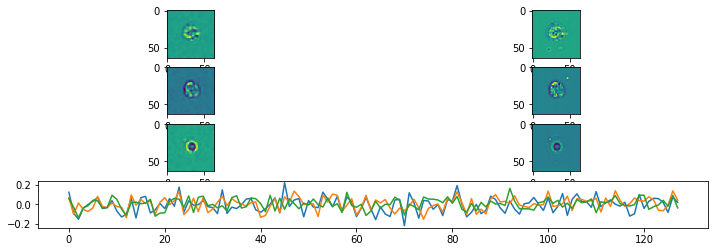

Epoch:  52 Iteration:  0 Loss:  1.4634286 0.61478317 7.632375e-05


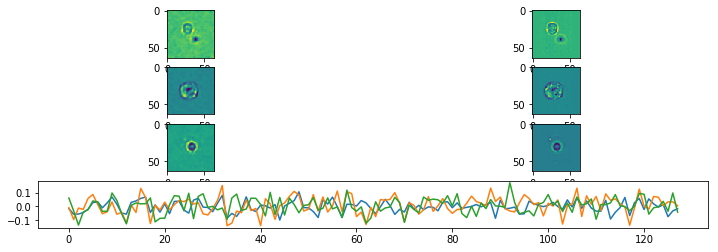

Epoch:  53 Iteration:  0 Loss:  1.4574145 0.61477923 6.2167645e-05


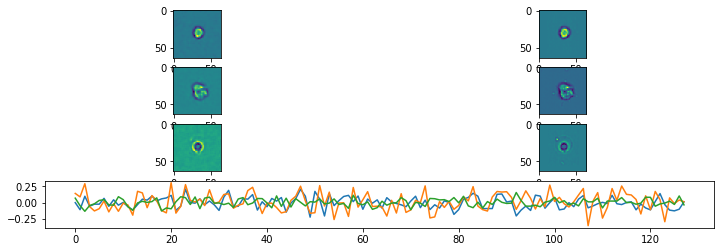

Epoch:  54 Iteration:  0 Loss:  1.4631517 0.61478245 0.0001412034


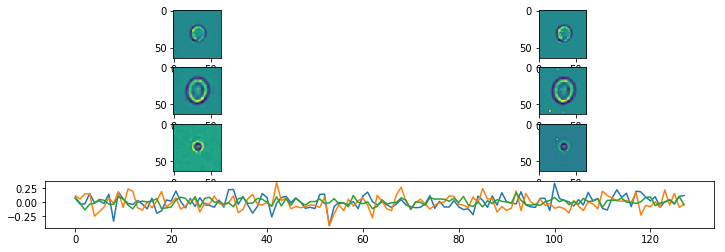

Epoch:  55 Iteration:  0 Loss:  1.9505717 0.6150678 0.00023275614


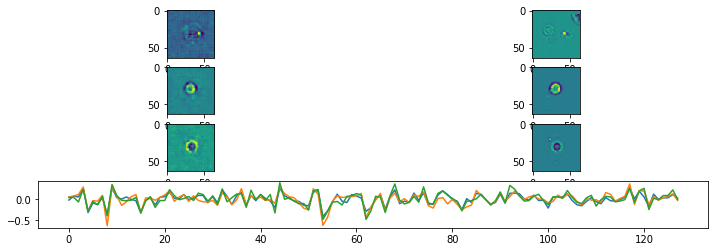

Epoch:  56 Iteration:  0 Loss:  1.6058402 0.61486727 0.000107467175


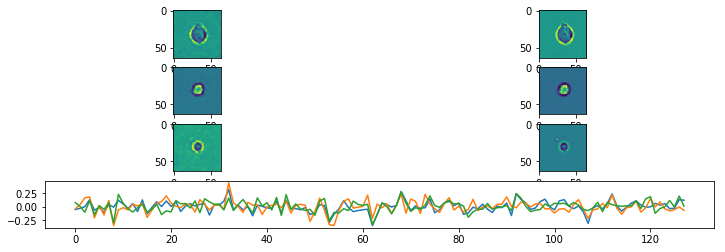

Epoch:  57 Iteration:  0 Loss:  1.5576735 0.61483896 7.921457e-05


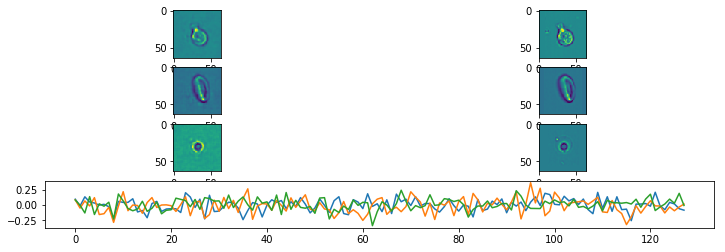

Epoch:  58 Iteration:  0 Loss:  1.5274602 0.6148212 0.00018003583


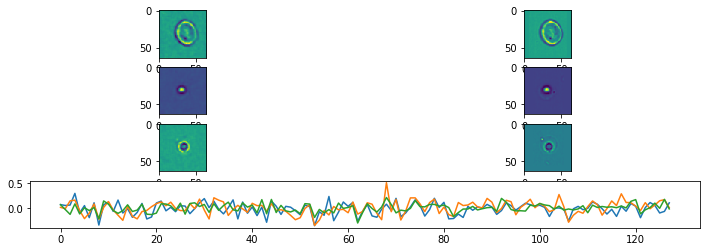

Epoch:  59 Iteration:  0 Loss:  1.5108671 0.6148114 4.4733286e-05


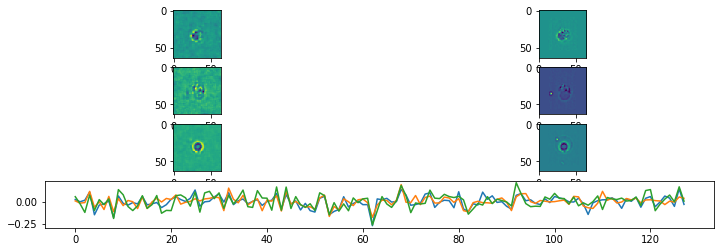

Done


In [6]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 64
p_height = 64
p_nchannels = 1
p_channels = [0]
p_nepochs = 60
p_batchsize = 64
p_learning_rate = 0.0002  #.00005
p_restore = False
p_latent_size = 128 #128 + 64
p_droprate = 0.95
p_stdev = .04

enc_sizes = [(64, 3), (128, 3), (256, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev

params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

cpdir = "/v/Checkpoints/Cytometry/2018-04-13-Ch0-64"
if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 500, cpdir)

In [7]:
x = 4
x

4